In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns  # for creating the graphs


In [2]:
# loading the data
url = 'https://raw.githubusercontent.com/noabogus/Project/main/mental_health_finaldata_1.csv'
df = pd.read_csv(url)
df.head(5)

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [3]:

# בחירת הנשים שנשארות בבית בתור מקצוע
#df_women_at_home = df[(df['Gender'] == 'Female') & (df['Occupation'] == 'Housewife')]


# חישוב הממוצעים של תנודות המצב הרוח והלחץ
#average_mood_fluctuations = (df_women_at_home['Mood_Swings']== 'yes')
#average_stress_level = df_women_at_home['Growing_Stress'].mean()

# הדפסת התוצאות
#print(f"Average mood fluctuations for women at home: {average_mood_fluctuations}")
#print(f"Average stress level for women at home: {average_stress_level}")


In [20]:
# replacing string data
columns_to_convert = ['Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History', 'Weight_Change', 'Coping_Struggles', 'Work_Interest','Social_Weakness']
converted_df = df.copy()
for column in columns_to_convert:
    converted_df[column] = df[column].replace({'Yes':1, 'No':0, 'Maybe': None})

# showign the new data
converted_df.head(5)

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,1.0,1.0,0.0,1.0,1.0,Medium,0,0.0,1.0
1,30-Above,Male,Others,31-60 days,1.0,1.0,NaN,0.0,0.0,High,0,0.0,1.0
2,30-Above,Female,Student,Go out Every day,0.0,0.0,1.0,0.0,0.0,Medium,1,NaN,0.0
3,25-30,Male,Others,1-14 days,1.0,0.0,NaN,0.0,NaN,Medium,0,NaN,1.0
4,16-20,Female,Student,More than 2 months,1.0,1.0,1.0,0.0,1.0,Medium,1,NaN,0.0


In [5]:
df_women_at_home = converted_df[(converted_df['Gender'] == 'Female') & (converted_df['Occupation'] == 'Housewife')]
df_women_at_home.count()

Age                        96
Gender                     96
Occupation                 96
Days_Indoors               96
Growing_Stress             64
Quarantine_Frustrations    62
Changes_Habits             66
Mental_Health_History      64
Weight_Change              62
Mood_Swings                96
Coping_Struggles           96
Work_Interest              67
Social_Weakness            57
dtype: int64

In [6]:
df_women_at_work = converted_df[(converted_df['Gender']=='Female')&(converted_df['Occupation'] =='Business')]
df_women_at_work.count()

Age                        79
Gender                     79
Occupation                 79
Days_Indoors               79
Growing_Stress             55
Quarantine_Frustrations    57
Changes_Habits             57
Mental_Health_History      51
Weight_Change              54
Mood_Swings                79
Coping_Struggles           79
Work_Interest              50
Social_Weakness            54
dtype: int64

In [7]:
#sns.histplot(df_women_at_work, x = 'Growing_Stress')
# sns.histplot(df_women_at_home, x = 'Growing_Stress')

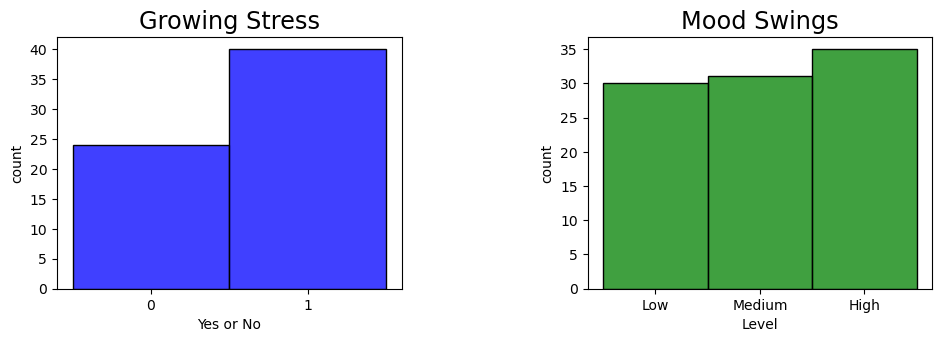

In [8]:
#sns.histplot(df_women_at_work, x = 'Mood_Swings')
# sns.histplot(df_women_at_home, x = 'Mood_Swings')


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histograms
g1 = sns.histplot(df_women_at_home.Growing_Stress, ax=axes[0], color='blue',discrete=True)
axes[0].set(xlabel='Yes or No', ylabel='count')
axes[0].set_xticks([0, 1])  # Set x-axis ticks
axes[0].set_xticklabels(['0', '1']) 
axes[0].set_title('Growing Stress', size='xx-large')

g2 = sns.histplot(df_women_at_home.Mood_Swings, ax=axes[1], color='green')
axes[1].set_title('Mood Swings',size='xx-large')
axes[1].set(xlabel='Level', ylabel='count')


#reduce the pad to get bigger histograms
plt.tight_layout(pad=10)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

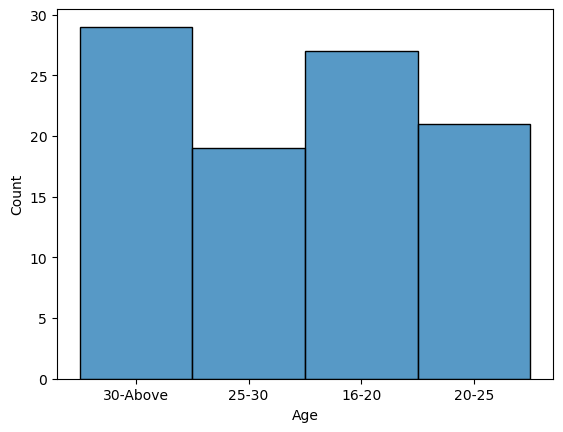

In [9]:
#sns.histplot(df_women_at_work, x = 'Age')
sns.histplot(df_women_at_home, x = 'Age')

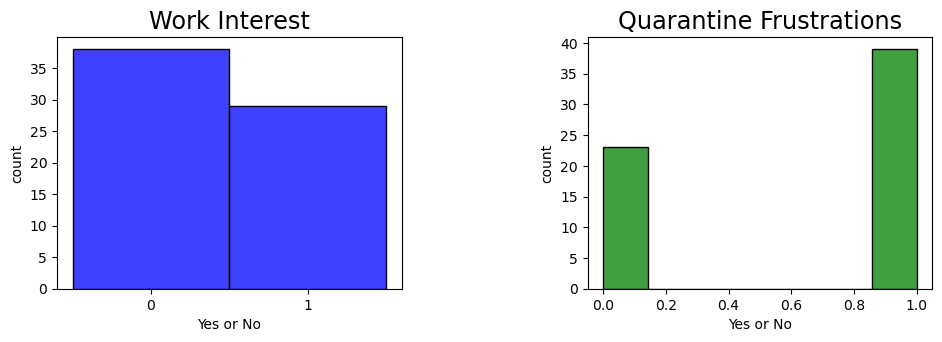

In [10]:
#קשר אפשרי בין נשים שנשארות בבית ולא מוצאות עניין בעבודה לתסכול הנבוע מהסגר בתקופת הקורונה

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histograms
g1 = sns.histplot(df_women_at_home.Work_Interest, ax=axes[0], color='blue',discrete=True)
axes[0].set(xlabel='Yes or No', ylabel='count')
axes[0].set_xticks([0, 1])  # Set x-axis ticks
axes[0].set_xticklabels(['0', '1']) 
axes[0].set_title('Work Interest', size='xx-large')

g2 = sns.histplot(df_women_at_home.Quarantine_Frustrations, ax=axes[1], color='green')
axes[1].set(xlabel='Yes or No', ylabel='count')
axes[0].set_xticks([0, 1])  # Set x-axis ticks
axes[0].set_xticklabels(['0', '1']) 
axes[0].set_title('Work Interest', size='xx-large')
axes[1].set_title('Quarantine Frustrations',size='xx-large')

#reduce the pad to get bigger histograms
plt.tight_layout(pad=10)
plt.show()

In [11]:
df_Male_at_home = converted_df[(converted_df['Gender'] == 'Male') & (converted_df['Occupation'] == 'Housewife')]
df_Male_at_home.count()

Age                        89
Gender                     89
Occupation                 89
Days_Indoors               89
Growing_Stress             56
Quarantine_Frustrations    62
Changes_Habits             65
Mental_Health_History      57
Weight_Change              54
Mood_Swings                89
Coping_Struggles           89
Work_Interest              60
Social_Weakness            63
dtype: int64

In [12]:
df_Male_at_work = converted_df[(converted_df['Gender']=='Male')&(converted_df['Occupation'] =='Business')]
df_Male_at_work.count()

Age                        66
Gender                     66
Occupation                 66
Days_Indoors               66
Growing_Stress             43
Quarantine_Frustrations    47
Changes_Habits             44
Mental_Health_History      50
Weight_Change              35
Mood_Swings                66
Coping_Struggles           66
Work_Interest              42
Social_Weakness            47
dtype: int64

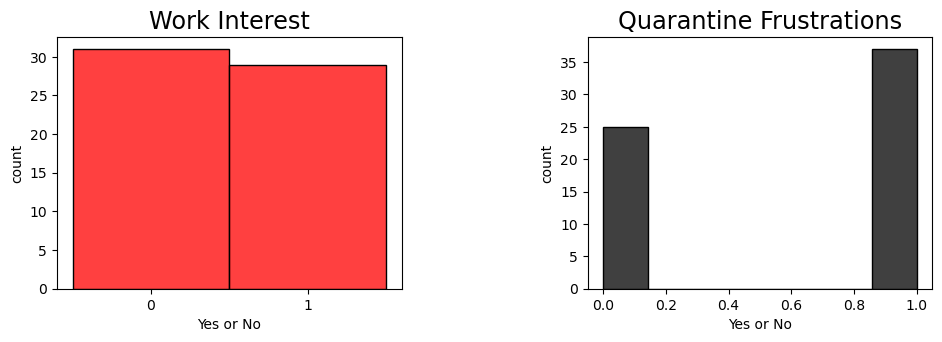

In [13]:
#קשר אפשרי בין גברים שנשארים בבית ולא מוצאים עניין בעבודה לתסכול הנבוע מהסגר בתקופת הקורונה
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histograms
g1 = sns.histplot(df_Male_at_home.Work_Interest, ax=axes[0], color='red',discrete=True)
axes[0].set(xlabel='Yes or No', ylabel='count')
axes[0].set_xticks([0, 1])  # Set x-axis ticks
axes[0].set_xticklabels(['0', '1']) 
axes[0].set_title('Work Interest', size='xx-large')

g2 = sns.histplot(df_Male_at_home.Quarantine_Frustrations, ax=axes[1], color='black')
axes[1].set(xlabel='Yes or No', ylabel='count')
axes[0].set_xticks([0, 1])  # Set x-axis ticks
axes[0].set_xticklabels(['0', '1']) 
axes[0].set_title('Work Interest', size='xx-large')
axes[1].set_title('Quarantine Frustrations',size='xx-large')

#reduce the pad to get bigger histograms
plt.tight_layout(pad=10)
plt.show()

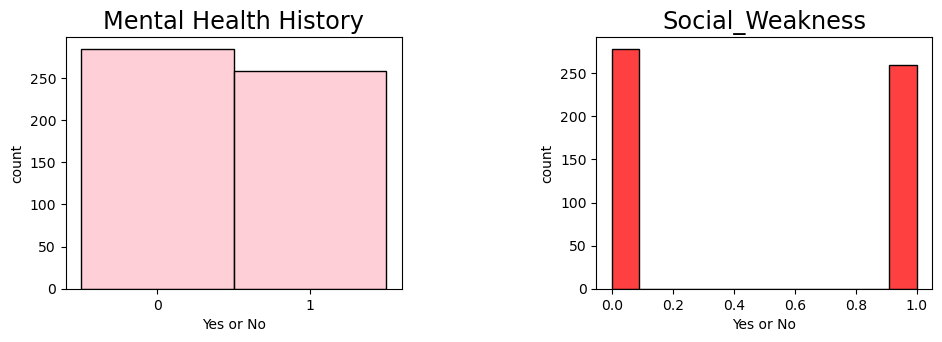

In [14]:
#קשר אפשרי בין חולשה חברתית לעבר דכאוני\בריאות הנפש

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histograms
g1 = sns.histplot(converted_df.Mental_Health_History, ax=axes[0], color='pink',discrete=True)
axes[0].set(xlabel='Yes or No', ylabel='count')
axes[0].set_xticks([0, 1])  # Set x-axis ticks
axes[0].set_xticklabels(['0', '1']) 
axes[0].set_title('Mental Health History', size='xx-large')

g2 = sns.histplot(converted_df.Social_Weakness, ax=axes[1], color='red')
axes[1].set(xlabel='Yes or No', ylabel='count')
axes[0].set_xticks([0, 1])  # Set x-axis ticks
axes[0].set_xticklabels(['0', '1']) 
axes[0].set_title('Mental Health History', size='xx-large')
axes[1].set_title('Social_Weakness',size='xx-large')

#reduce the pad to get bigger histograms
plt.tight_layout(pad=10)
plt.show()

In [30]:
#ניסיתי להציג באותה צורה כמו התצוגגות הקודמות את ההבדל בין גברים לנשים בהתמודדות עם קשיים משום מה הוא טוען שאין נתונים להצגה - אשמח שתנסי גם
df_Male = (converted_df[converted_df.Gender == 'Male'])
df_women = (converted_df[converted_df.Gender == 'Female'])
g1 = sns.histplot(df_Male.Coping_Struggles, ax=axes[0], color='blue',discrete=True)
axes[0].set(xlabel='Yes or No', ylabel='count')
axes[0].set_xticks([0, 1])  # Set x-axis ticks
axes[0].set_xticklabels(['0', '1']) 
axes[0].set_title('Coping Struggles', size='xx-large')

g2 = sns.histplot(df_women.Coping_Struggles, ax=axes[1], color='pink')
axes[1].set(xlabel='Yes or No', ylabel='count')
axes[0].set_xticks([0, 1])  # Set x-axis ticks
axes[0].set_xticklabels(['0', '1']) 
axes[0].set_title('Coping Struggles', size='xx-large')
axes[1].set_title('Coping Struggles',size='xx-large')

#reduce the pad to get bigger histograms
plt.tight_layout(pad=10)
plt.show()


<Figure size 640x480 with 0 Axes>

In [25]:
df_Male = converted_df[converted_df['Gender'] == 'Male']
df_Male.count()



Age                        390
Gender                     390
Occupation                 390
Days_Indoors               390
Growing_Stress             253
Quarantine_Frustrations    266
Changes_Habits             263
Mental_Health_History      266
Weight_Change              241
Mood_Swings                390
Coping_Struggles           390
Work_Interest              254
Social_Weakness            251
dtype: int64

In [26]:
df_women = converted_df[converted_df['Gender'] == 'Female']
df_women.count()

Age                        434
Gender                     434
Occupation                 434
Days_Indoors               434
Growing_Stress             304
Quarantine_Frustrations    292
Changes_Habits             293
Mental_Health_History      276
Weight_Change              302
Mood_Swings                434
Coping_Struggles           434
Work_Interest              289
Social_Weakness            286
dtype: int64

In [33]:
corrs = converted_df.corr(method = 'kendall')


In [34]:
corrs

,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Coping_Struggles,Work_Interest,Social_Weakness
Growing_Stress,1.000000,0.062777,-0.058437,-0.001943,-0.005816,-0.004967,0.081667,0.032328
Quarantine_Frustrations,0.062777,1.000000,-0.037484,0.044578,-0.032017,-0.003921,0.023410,-0.034709
Changes_Habits,-0.058437,-0.037484,1.000000,-0.000576,0.011658,0.021334,0.083982,0.014119
Mental_Health_History,-0.001943,0.044578,-0.000576,1.000000,-0.048897,-0.006327,0.098849,-0.057166
Weight_Change,-0.005816,-0.032017,0.011658,-0.048897,1.000000,0.031578,-0.002606,-0.036337
Coping_Struggles,-0.004967,-0.003921,0.021334,-0.006327,0.031578,1.000000,0.032102,0.014573
Work_Interest,0.081667,0.023410,0.083982,0.098849,-0.002606,0.032102,1.000000,-0.089886
Social_Weakness,0.032328,-0.034709,0.014119,-0.057166,-0.036337,0.014573,-0.089886,1.000000


<AxesSubplot:>

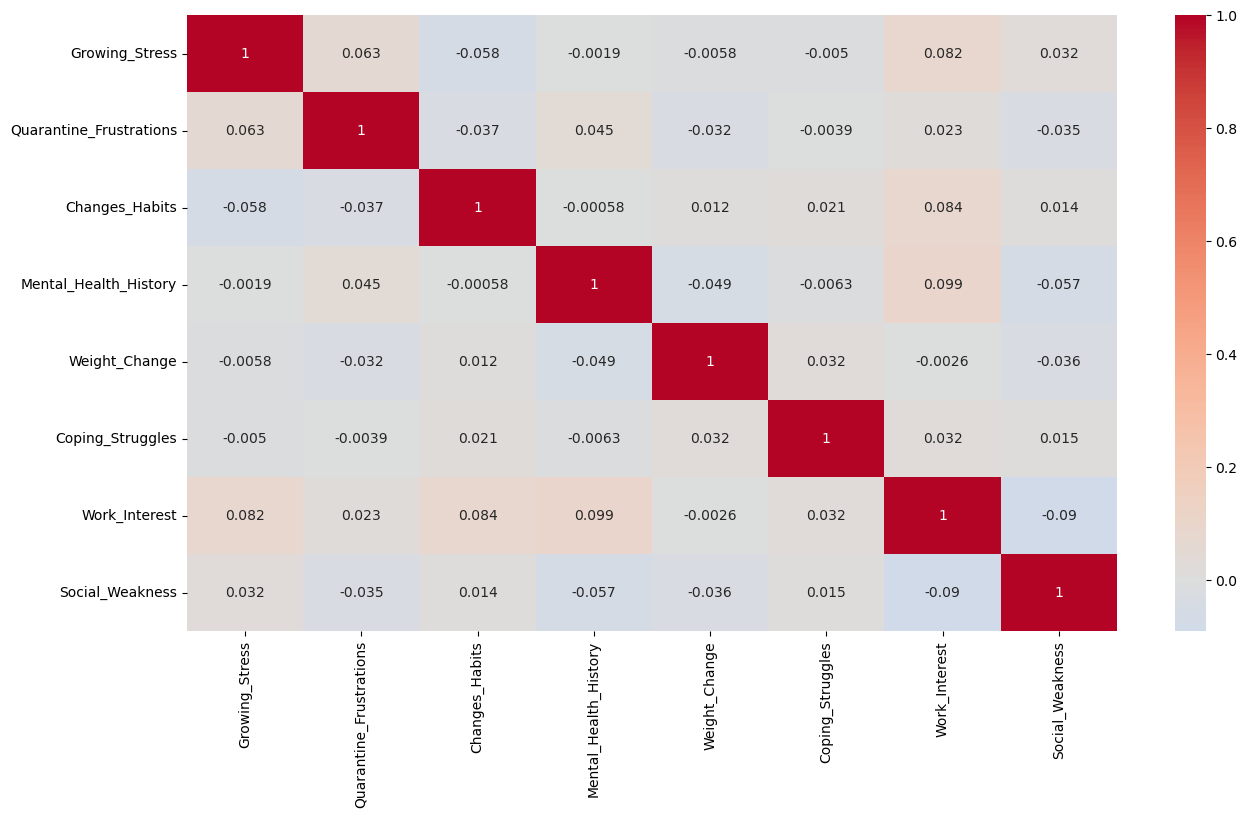

In [35]:
plt.figure(figsize=(15,8))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True)

In [ ]:
### 